In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from jupyterthemes import jtplot
jtplot.reset()

In [2]:
# Make DataFrame from RNAseq Results
results_cold = pd.read_csv('ff-cold-VS-AGKO-cold.GeneDiffExp.csv')
results_hfd = pd.read_csv('ff-HFD-VS-AGKO-HFD.GeneDiffExp.csv')

In [3]:
results_cold.head()

,geneID,geneLength,ff-cold-Expression,AGKO-cold-Expression,ff-cold-FPKM,AGKO-cold-FPKM,log2 Ratio(AGKO-cold/ff-cold),Up-Down-Regulation(AGKO-cold/ff-cold),P-value,FDR,Symbol,Description,KEGG Orthology,GO Component,GO Function,GO Process,Blast nr
0,668039,4538.0,0.0,412.58,0.01,7.77,9.601771,Up,3.600000e-125,1.320000e-121,Gm14434,predicted gene 14434,K09228,-,-,-,gi|150246529|ref|NP_001092819.1|/0/1
1,100043915,4538.0,0.0,412.45,0.01,7.76,9.599913,Up,3.600000e-125,1.100000e-121,Gm4724,predicted gene 4724,K09228,-,-,-,gi|150246529|ref|NP_001092819.1|/0/1
2,100217454,53.0,0.0,1.00,0.01,5.14,9.005625,Up,4.976640e-01,8.717756e-01,Snord37,"small nucleolar RNA, C/D box 37",-,-,-,-,-
3,100526560,88.0,0.0,3.00,0.01,4.94,8.948367,Up,1.238350e-01,6.197805e-01,Mir3109,microRNA 3109,-,-,-,-,-
4,100861572,71.0,0.0,2.00,0.01,4.91,8.939579,Up,2.482500e-01,7.540824e-01,DQ267102,snoRNA DQ267102,-,-,-,-,-


In [4]:
# Make DataFrame from DAVID cellular component classification for significantly different genes
df_cold_cc = pd.read_csv('ff v agko-cold combined-cc_direct.csv').sort_values('Count', ascending=False)
df_hfd_cc = pd.read_csv('ff v agko-hfd combined-cc_direct.csv').sort_values('Count', ascending=False)

# Make DataFrame from DAVID biological process classification for significantly different genes
df_cold_bp = pd.read_csv('ff v agko-cold combined-bp_direct.csv').sort_values('Count', ascending=False)
df_hfd_bp = pd.read_csv('ff v agko-hfd combined-bp_direct.csv').sort_values('Count', ascending=False)

# Make DataFrame from DAVID KEGG Pathway classification for significantly different genes
df_cold_kegg = pd.read_csv('ff v agko-cold combined-kegg_pthwy.csv').sort_values('Count', ascending=False)
df_hfd_kegg = pd.read_csv('ff v agko-hfd combined-kegg_pthwy.csv').sort_values('Count', ascending=False)

Text(0,0.5,'# Significantly Different Genes')

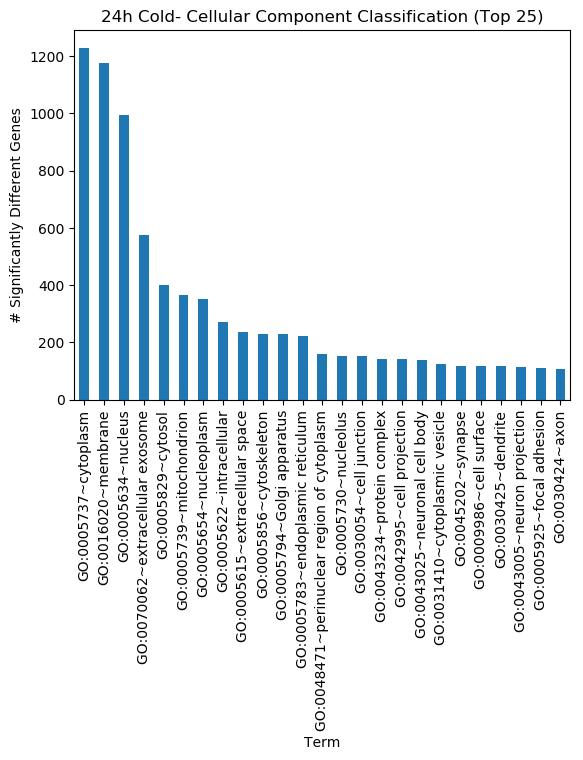

In [32]:
# Look at df_cold_cc distribution of cellular comopnent classifications
cold_plot_cc = df_cold_cc.set_index('Term')['Count'][:25].plot(kind='bar', 
                                                title = "24h Cold- Cellular Component Classification (Top 25)")
cold_plot_cc.set_ylabel('# Significantly Different Genes')

Text(0,0.5,'# Significantly Different Genes')

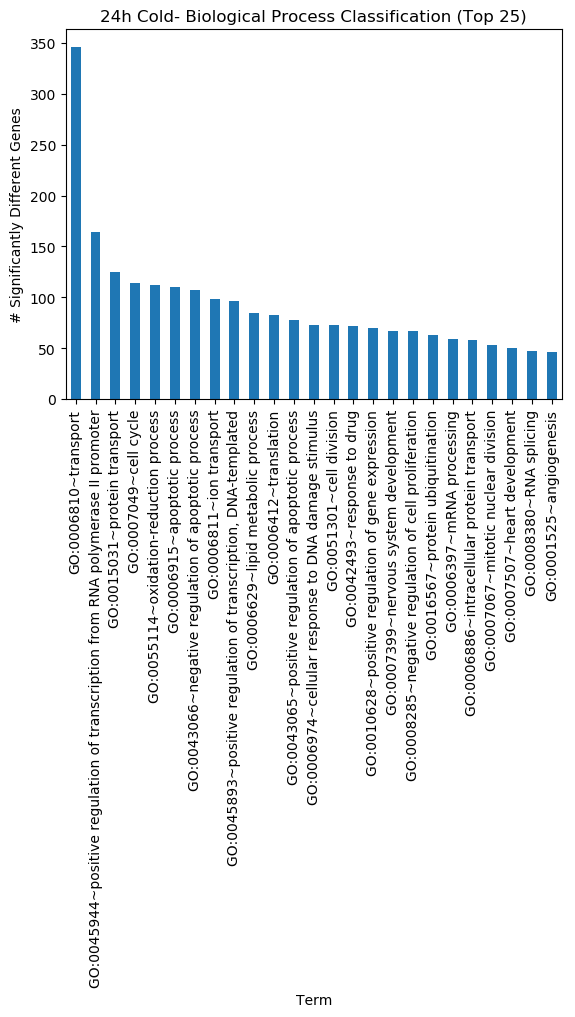

In [31]:
# Look at df_cold_bp distribution of biological process classifications
cold_plot_bp = df_cold_bp.set_index('Term')['Count'][:25].plot(kind='bar', 
                                                    title = "24h Cold- Biological Process Classification (Top 25)")
cold_plot_bp.set_ylabel('# Significantly Different Genes')

Text(0,0.5,'# Significantly Different Genes')

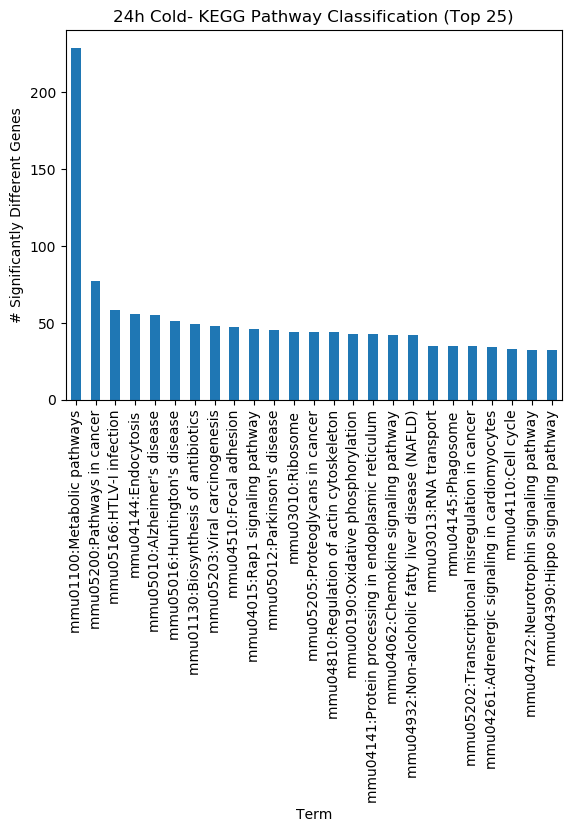

In [30]:
# Look at df_cold_kegg distribution of KEGG pathway classifications
cold_plot_kegg = df_cold_kegg.set_index('Term')['Count'][:25].plot(kind='bar', 
                                                title = "24h Cold- KEGG Pathway Classification (Top 25)")
cold_plot_kegg.set_ylabel('# Significantly Different Genes')

Text(0,0.5,'# Significantly Different Genes')

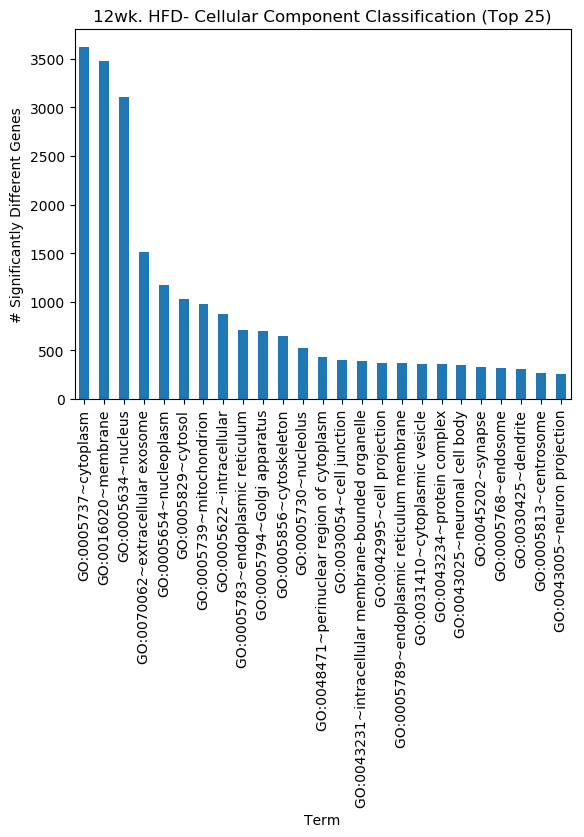

In [29]:
# Look at df_hfd_cc distribution of cellular comopnent classifications
hfd_plot_cc = df_hfd_cc.set_index('Term')['Count'][:25].plot(kind='bar', 
                                                title = "12wk. HFD- Cellular Component Classification (Top 25)")
hfd_plot_cc.set_ylabel('# Significantly Different Genes')

Text(0,0.5,'# Significantly Different Genes')

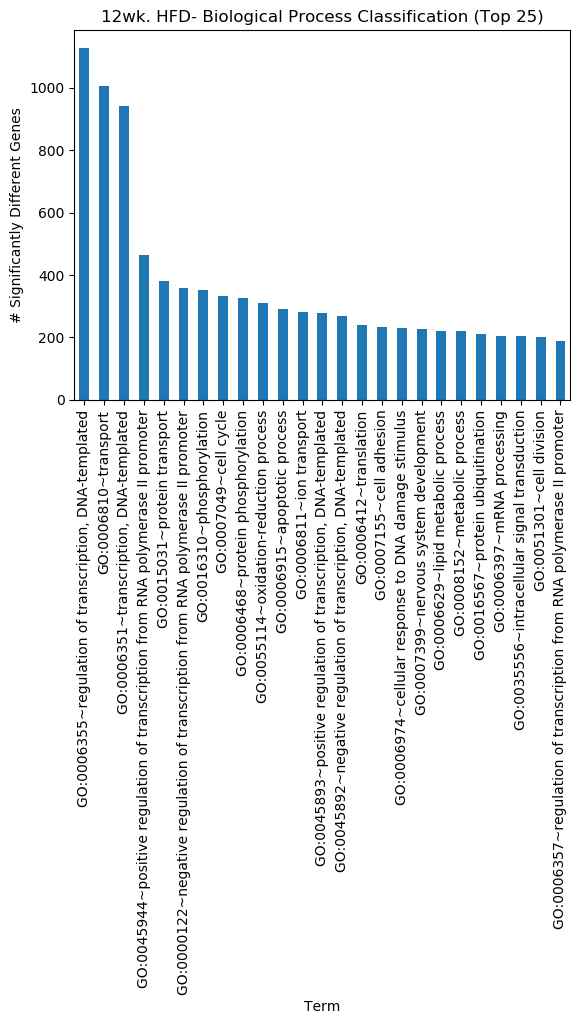

In [25]:
# Look at df_hfd_bp distribution of biological process classifications
hfd_plot_bp = df_hfd_bp.set_index('Term')['Count'][:25].plot(kind='bar', 
                                                title = "12wk. HFD- Biological Process Classification (Top 25)")
hfd_plot_bp.set_ylabel('# Significantly Different Genes')

Text(0,0.5,'# Significantly Different Genes')

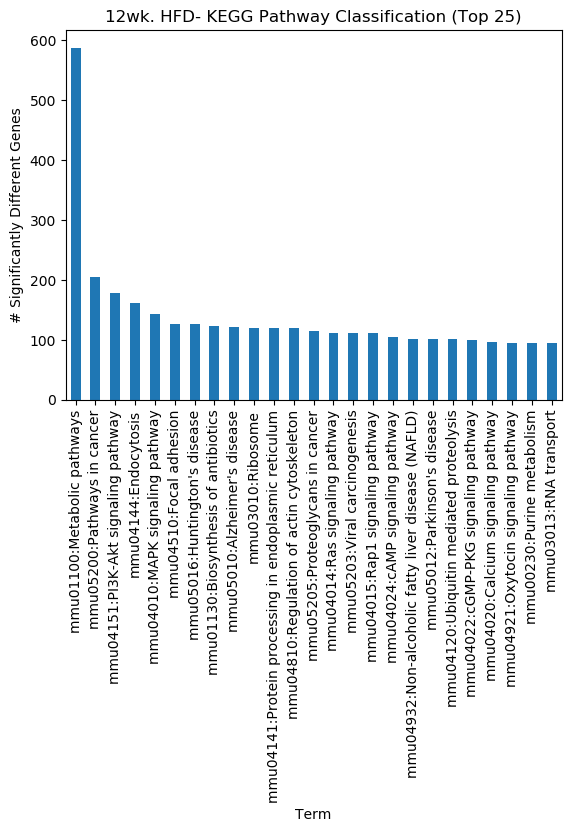

In [26]:
# Look at df_hfd_kegg distribution of KEGG pathway classifications
hfd_plot_kegg = df_hfd_kegg.set_index('Term')['Count'][:25].plot(kind='bar', 
                                                title = "12wk. HFD- KEGG Pathway Classification (Top 25)")
hfd_plot_kegg.set_ylabel('# Significantly Different Genes')

In [11]:
# metabolic = mmu01100:Metabolic pathways
for i in df_hfd_kegg['Term']:
    if 'Metabolic' in i:
        print(i)

mmu01100:Metabolic pathways


In [12]:
# Select metabolic genes for cold and hfd animals
cold_kegg_metabolic_list = list(df_cold_kegg[df_cold_kegg['Term'] == 'mmu01100:Metabolic pathways']['Genes'].
                          str.split(', '))[0]

hfd_kegg_metabolic_list = list(df_hfd_kegg[df_hfd_kegg['Term'] == 'mmu01100:Metabolic pathways']['Genes'].
                          str.split(', '))[0]

In [13]:
# Create sublist containing metabolic genes from cold and hfd KEGG pathways
ind_cold = results_cold['Symbol'].str.upper()
ind_hfd = results_hfd['Symbol'].str.upper()

cold_kegg_metabolic_genes = results_cold.copy().set_index(ind_cold).loc[cold_kegg_metabolic_list]
hfd_kegg_metabolic_genes = results_hfd.copy().set_index(ind_hfd).loc[hfd_kegg_metabolic_list]

In [14]:
# Create column with absolute log2 Ratio(AGKO-cold/ff-cold) value to use for sorting
cold_kegg_metabolic_genes["abs log2 Ratio(AGKO-cold/ff-cold)"] = abs(
    cold_kegg_metabolic_genes["log2 Ratio(AGKO-cold/ff-cold)"])

hfd_kegg_metabolic_genes["abs log2 Ratio(AGKO-HFD/ff-HFD)"] = abs(
    hfd_kegg_metabolic_genes["log2 Ratio(AGKO-HFD/ff-HFD)"])

Text(0,0.5,'log2 Ratio(AGKO-cold/ff-cold)')

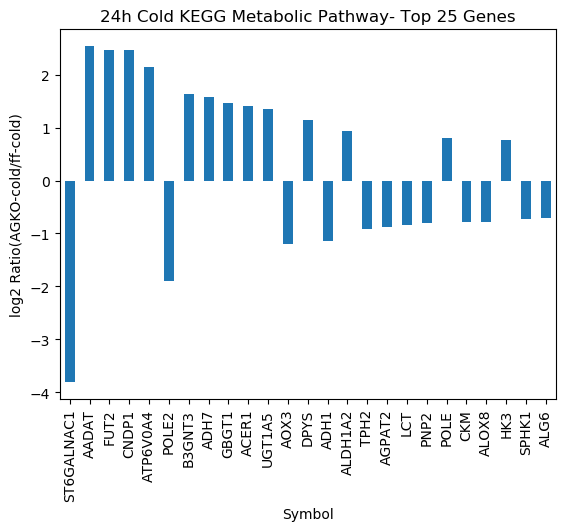

In [27]:
# Plot the top 25 KEGG Metabolic pathway genes for 24h cold group
cold_plot_kegg_metabolic_genes = cold_kegg_metabolic_genes.sort_values(
    "abs log2 Ratio(AGKO-cold/ff-cold)", ascending=False)["log2 Ratio(AGKO-cold/ff-cold)"][1:26].plot(
    kind='bar', title = "24h Cold KEGG Metabolic Pathway- Top 25 Genes")
cold_plot_kegg_metabolic_genes.set_ylabel("log2 Ratio(AGKO-cold/ff-cold)")

Text(0.5,1,'24h Cold KEGG Metabolic Pathway- Top 25 Genes Heatmap')

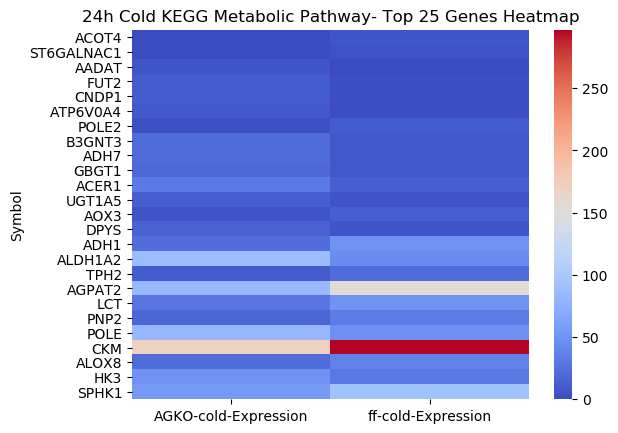

In [46]:
# Heatmap for top 25 cold metabolic genes
cold_kegg_metabolic_genes_heatmap = sns.heatmap(cold_kegg_metabolic_genes.sort_values(
    "abs log2 Ratio(AGKO-cold/ff-cold)", ascending=False)[['AGKO-cold-Expression', 'ff-cold-Expression']][:25], 
            annot=False, cmap='coolwarm')

cold_kegg_metabolic_genes_heatmap.set_title('24h Cold KEGG Metabolic Pathway- Top 25 Genes Heatmap')

Text(0,0.5,'log2 Ratio(AGKO-HFD/ff-HFD)')

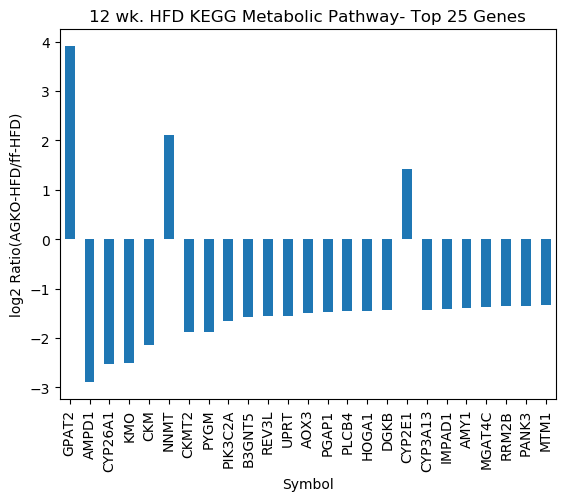

In [28]:
# Plot the top 25 KEGG Metabolic pathway genes for hfd group
hfd_plot_kegg_metabolic_genes = hfd_kegg_metabolic_genes.sort_values(
    "abs log2 Ratio(AGKO-HFD/ff-HFD)", ascending=False)["log2 Ratio(AGKO-HFD/ff-HFD)"][1:26].plot(
    kind='bar', title = "12 wk. HFD KEGG Metabolic Pathway- Top 25 Genes")
hfd_plot_kegg_metabolic_genes.set_ylabel("log2 Ratio(AGKO-HFD/ff-HFD)")

Text(0.5,1,'12wk. HFD KEGG Metabolic Pathway- Top 25 Genes Heatmap')

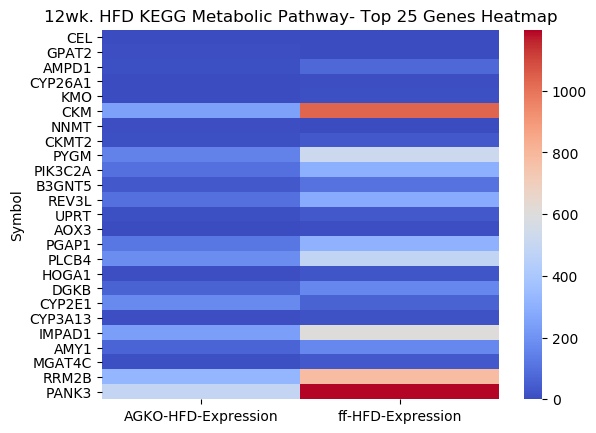

In [48]:
# Heatmap for top 25 hfd metabolic genes
hfd_kegg_metabolic_genes_heatmap = sns.heatmap(hfd_kegg_metabolic_genes.sort_values(
    "abs log2 Ratio(AGKO-HFD/ff-HFD)", ascending=False)[['AGKO-HFD-Expression', 'ff-HFD-Expression']][:25], 
            annot=False, cmap='coolwarm')
hfd_kegg_metabolic_genes_heatmap.set_title('12wk. HFD KEGG Metabolic Pathway- Top 25 Genes Heatmap')